<a href="https://colab.research.google.com/github/muralikrishnan2022/Energy_Consumption_Analysis/blob/main/Energy_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=636816b2d25d4b84da6e0f6ac9c38f798f64b372043c19854bcd581e3dca1359
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd

In [ ]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("PowerConsumption vs datetime") \
    .getOrCreate()

In [ ]:
# Read data from Parquet file
parquet_file_path = "/content/est_hourly.paruqet"
df = spark.read.parquet(parquet_file_path)

In [ ]:
# Convert DataFrame to Pandas DataFrame
pandas_df = df.toPandas()
pandas_df

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,Datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0,1998-12-31 01:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0,1998-12-31 02:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0,1998-12-31 03:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0,1998-12-31 04:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0,1998-12-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN,2018-01-01 20:00:00
178258,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN,2018-01-01 21:00:00
178259,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN,2018-01-01 22:00:00
178260,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN,2018-01-01 23:00:00


Text(0, 0.5, 'range of power consumption')

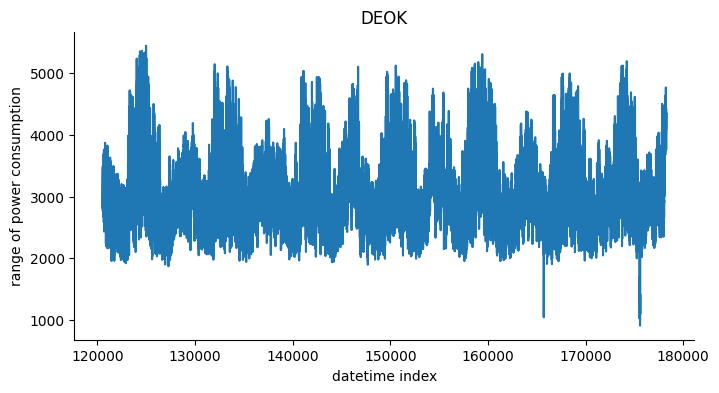

In [ ]:
from matplotlib import pyplot as plt
pandas_df['DEOK'].plot(kind='line', figsize=(8, 4), title='DEOK')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('datetime index')
plt.ylabel('range of power consumption')

Text(0, 0.5, 'range of power consumption')

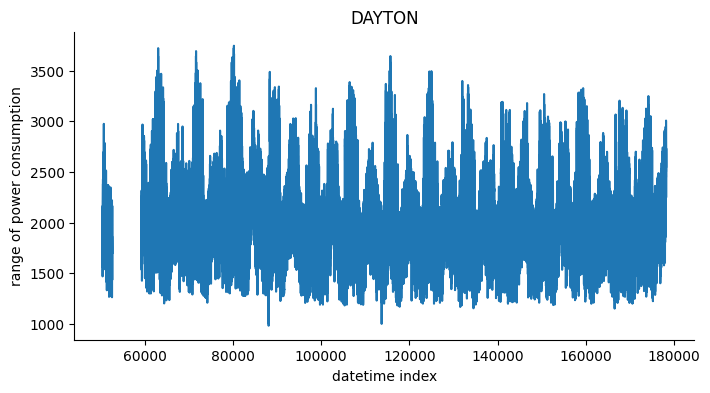

In [ ]:
from matplotlib import pyplot as plt
pandas_df['DAYTON'].plot(kind='line', figsize=(8, 4), title='DAYTON')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('datetime index')
plt.ylabel('range of power consumption')

Text(0, 0.5, 'range of power consumption')

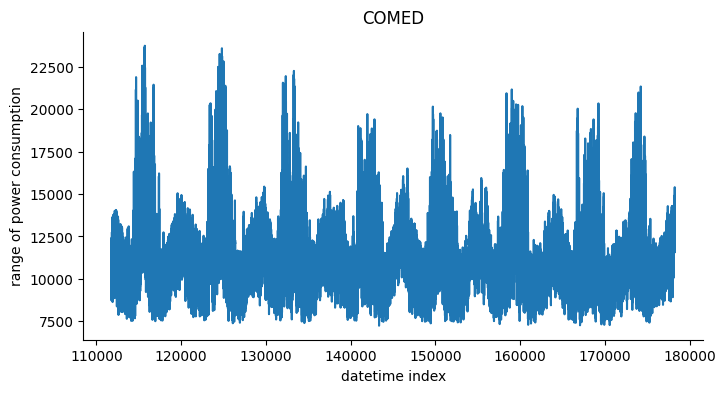

In [ ]:
from matplotlib import pyplot as plt
pandas_df['COMED'].plot(kind='line', figsize=(8, 4), title='COMED')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('datetime index')
plt.ylabel('range of power consumption')

Text(0, 0.5, 'range of power consumption')

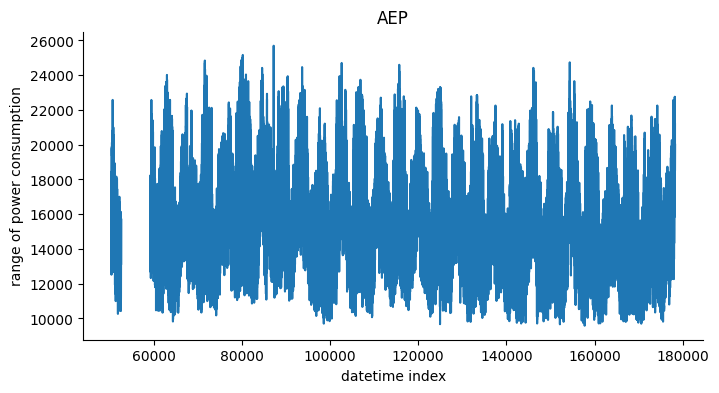

In [ ]:
from matplotlib import pyplot as plt
pandas_df['AEP'].plot(kind='line', figsize=(8, 4), title='AEP')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('datetime index')
plt.ylabel('range of power consumption')

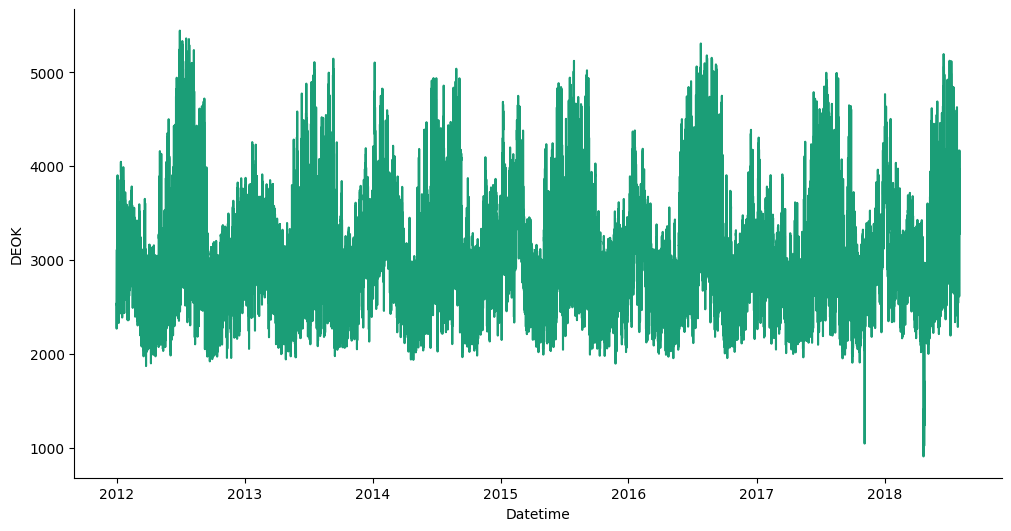

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['DEOK']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pandas_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('DEOK')

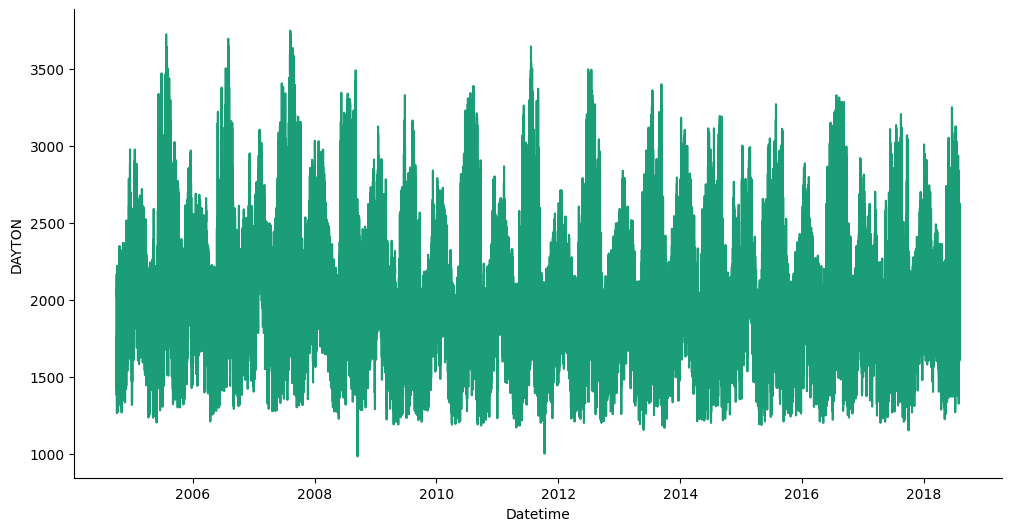

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['DAYTON']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pandas_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('DAYTON')

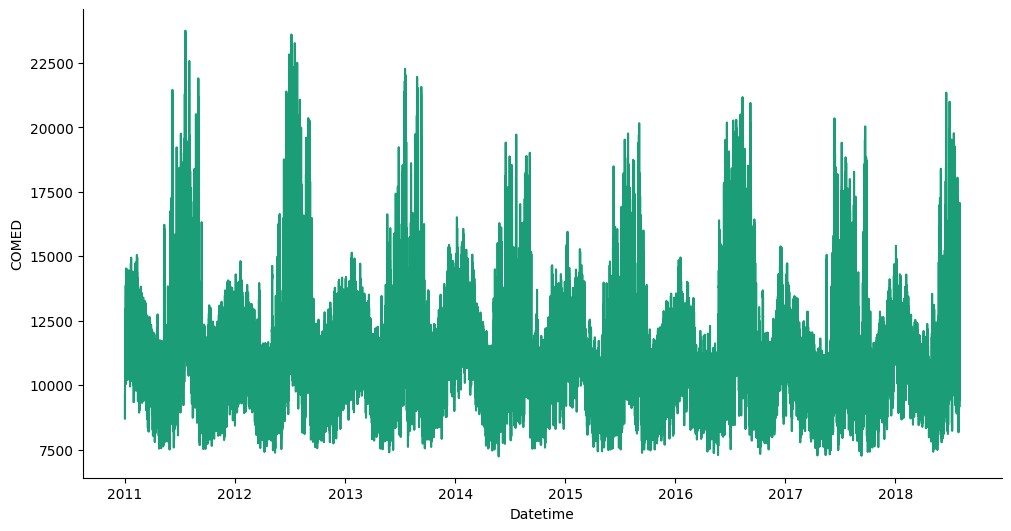

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['COMED']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pandas_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('COMED')

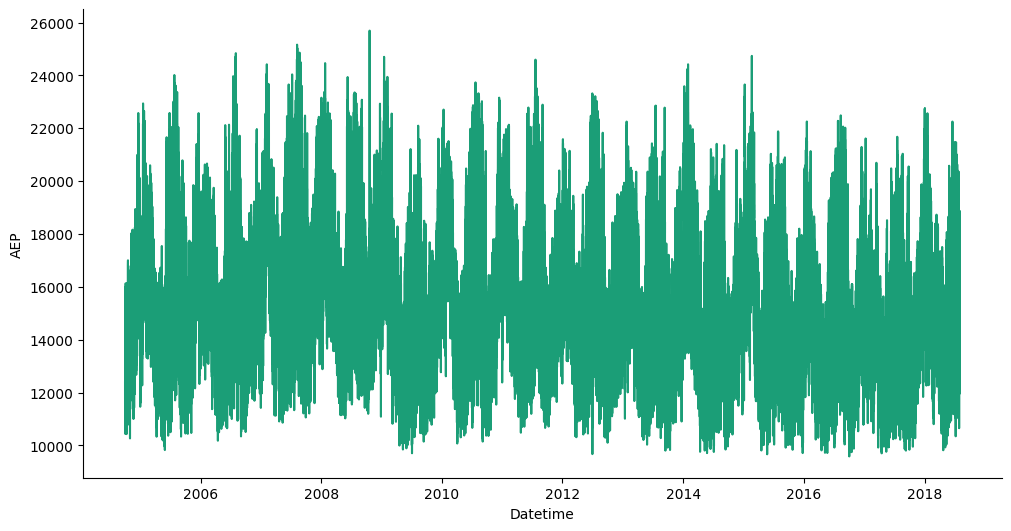

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['AEP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pandas_df.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('AEP')

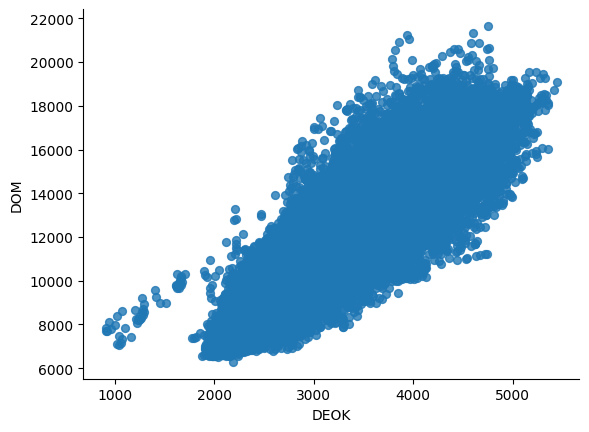

In [ ]:
from matplotlib import pyplot as plt
pandas_df.plot(kind='scatter', x='DEOK', y='DOM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

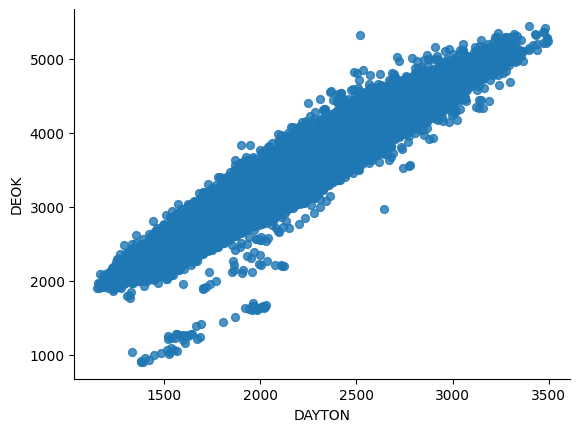

In [ ]:
from matplotlib import pyplot as plt
pandas_df.plot(kind='scatter', x='DAYTON', y='DEOK', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

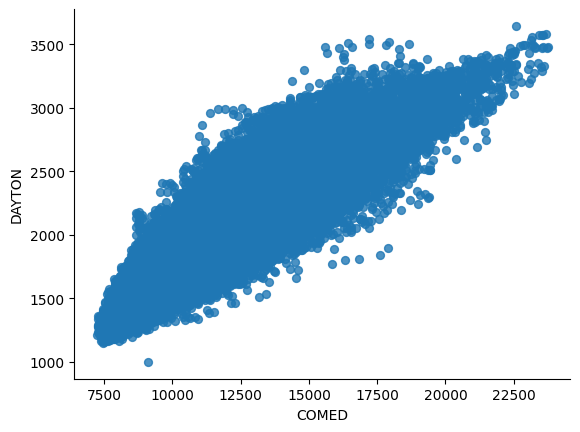

In [ ]:
from matplotlib import pyplot as plt
pandas_df.plot(kind='scatter', x='COMED', y='DAYTON', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

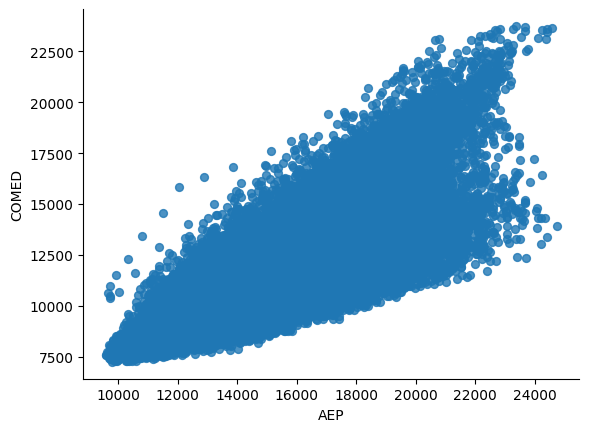

In [ ]:
from matplotlib import pyplot as plt
pandas_df.plot(kind='scatter', x='AEP', y='COMED', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

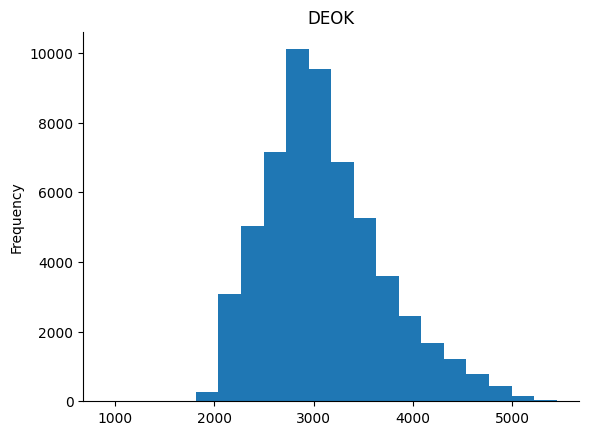

In [ ]:
from matplotlib import pyplot as plt
pandas_df['DEOK'].plot(kind='hist', bins=20, title='DEOK')
plt.gca().spines[['top', 'right',]].set_visible(False)

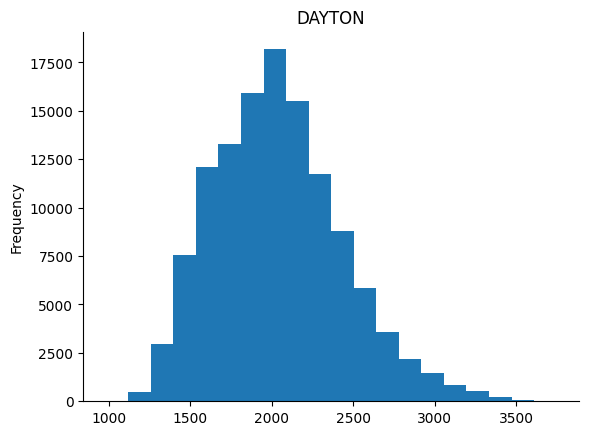

In [ ]:
from matplotlib import pyplot as plt
pandas_df['DAYTON'].plot(kind='hist', bins=20, title='DAYTON')
plt.gca().spines[['top', 'right',]].set_visible(False)

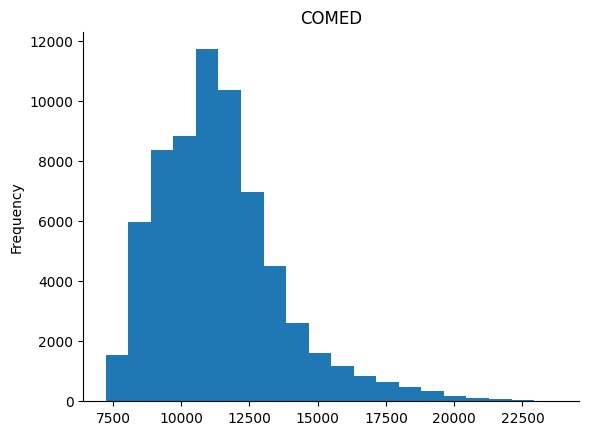

In [ ]:
from matplotlib import pyplot as plt
pandas_df['COMED'].plot(kind='hist', bins=20, title='COMED')
plt.gca().spines[['top', 'right',]].set_visible(False)

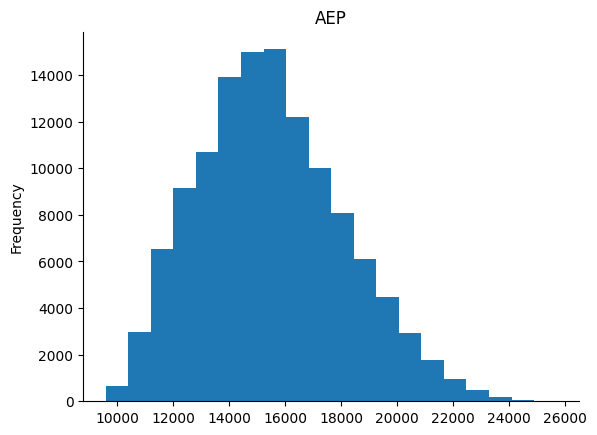

In [ ]:
from matplotlib import pyplot as plt
pandas_df['AEP'].plot(kind='hist', bins=20, title='AEP')
plt.gca().spines[['top', 'right',]].set_visible(False)